In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Q1
df_titanic=pd.read_csv("train.csv")
df_titanic.head()
#The head function returns n values from the beginning, By default, the function returns 5 values from the beginning.
#pd.read_csv function reads the csv file.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_titanic.info() #info function shows information about titanic dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Q2
shape=df_titanic.shape
print("Shape:"+str(shape))
#shape function returns a tuple. (number of people on ship, number of features)
#number of people on the ship =891
#number of features = 12

Shape:(891, 12)


In [5]:
#Q3
totalNumber=df_titanic.isnull().sum().sum()
print("Total number of null values: "+str(totalNumber))
df_titanic.isnull().sum()
#Age, cabin, and embarked have null values
#Age has 177 null values, cabin has 687 null values, embarked has 2 values.
#total number of missing values is 866.

Total number of null values: 866


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Q4
df_titanic["Survived"].value_counts()
#the number of people who died is 549
#the number of people who survived is 342

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Percentage of Passengers that Survived and did not Survive')

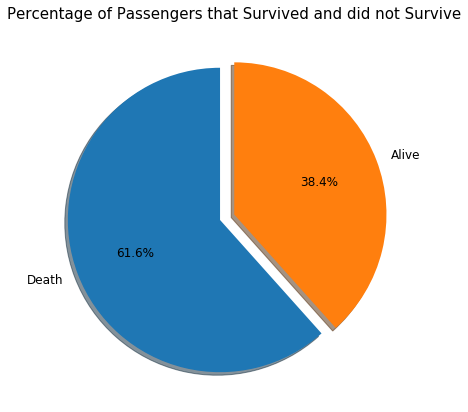

In [7]:
#Q4
sizes = df_titanic["Survived"].value_counts() 
labels=["Death","Alive"]
explode=(0.1,0)
chart1=plt.figure(figsize=(10,7))
plt.pie(sizes,explode,labels=labels,autopct="%1.1f%%",startangle=90,shadow=True,textprops={'fontsize': 12})
plt.title("Percentage of Passengers that Survived and did not Survive",fontsize=15)
#There are more dead people than survivors. 

In [8]:
#Q5
df_titanic["Sex"].value_counts() 
#There are 577 male passengers and 314 female passengers on the ship.

male      577
female    314
Name: Sex, dtype: int64

Text(0, 0.5, 'Total Number')

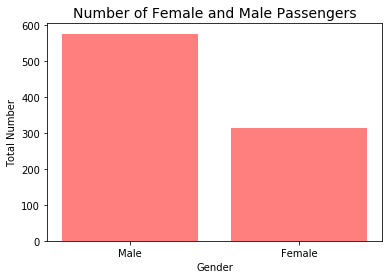

In [9]:
#Q5
genderNum= df_titanic["Sex"].value_counts() ##577, 314
labels2="Male","Female"
plt.bar(labels2,genderNum,align="center",alpha=0.5,color="red")
plt.title("Number of Female and Male Passengers", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Total Number")
#The number of male passengers is higher than the number of female passengers.

In [10]:
#Q6
df_titanic.groupby("Sex")["Survived"].value_counts()
#number of females who survived = 233
#number of males who survived = 109
#number of females who died = 81
#number of males who died = 468

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0, 0.5, 'Total Number')

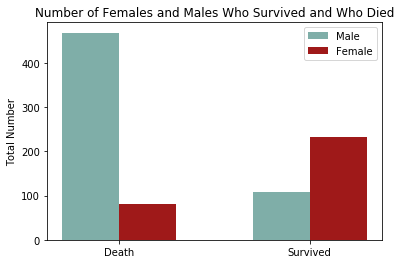

In [11]:
#Q6
table =df_titanic.groupby("Sex")["Survived"].value_counts()
deathFemale= table["female"][0]  #number of women who died
survivedFemale=table["female"][1] #number of women who survived
deathMale = table["male"][0] #number of men who died
survivedMale = table["male"][1] #number of men who survived

maleNum=[deathMale,survivedMale]
femaleNum=[deathFemale,survivedFemale]
X = np.arange(2)

plt.bar(X,maleNum,label="Male",width =0.3,color="#005E52",alpha=0.5)
plt.bar(X+0.3,femaleNum, label="Female",width =0.3,color="#950000",alpha=0.9)
plt.xticks(X+0.15,("Death","Survived"))
plt.legend()
plt.title("Number of Females and Males Who Survived and Who Died")
plt.ylabel("Total Number")

#The number of male passengers who died is higher than the number of female passenger who died.
#The number of female passengers who survived is higher than the number of male passenger who survived.

In [12]:
#Q7
"""
#In question 5, I calculated the number of men and women and set it as genderNum.
#In question 6,I calculated the numbers of men surviving men and women. I assigned these number as survivedFemale and survivedMale
"""
genderNum
#number of men = 577, number of women = 314

male      577
female    314
Name: Sex, dtype: int64

Survival rate of females=0.7420382165605095
Survival rate of males=0.18890814558058924


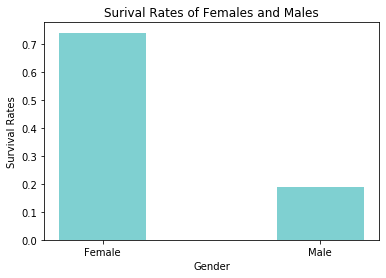

In [13]:
#Q7
totalFemaleNum=genderNum["female"] #314
totalMaleNum=genderNum["male"] #577
rateFemale=survivedFemale/totalFemaleNum
rateMale=survivedMale/totalMaleNum
rates=(rateFemale,rateMale)
labels="Female","Male"
plt.bar(labels,rates,align="center",alpha=0.5,color="#00A3A5",width=0.4)
plt.title("Surival Rates of Females and Males")
plt.xlabel("Gender")
plt.ylabel("Survival Rates")
print("Survival rate of females="+str(rateFemale)+"\nSurvival rate of males="+str(rateMale))


#Number of male passengers is 577, and number of female passengers is 314. 
#There were more male passengers than female passengers in total in the ship.
#Number of male passengers who survived is 109 and number of who survived is 233.
#Although there are more male passengers on ship, the number of surviving female passengers is more than male passengers.
#The reason why women survived more might be that women and children are the priority in rescue efforts.
#In addition, the fact that the people working on the ship are more men may have affected this situation.


In [14]:
#Q8
print("Rate for the 1st class:"+str(136/216)) #rate for the 1st class =number of survivors in the 1st class / all passengers in the 1st class.
print("Rate for the 2nd class:"+str(87/184)) #rate for the 2nd class =number of survivors in the 2nd class / all passengers in the 2nd class.
print("Rate for the 3rd class:"+str(119/491)) #rate for the 3rd class =number of survivors in the 3rd class / all passengers in the 3rd class.
pd.crosstab(index=df_titanic['Pclass'],columns=df_titanic['Survived'],margins=True)
#The number of survivors in the 1st class is higher than the others.
#That is, the class with the highest number of surviving passengers is 1st class.

#The number of survivors in the 2nd class is lower than the others. 
#That is, the class with the lowest number of surviving passengers is 2nd class.


Rate for the 1st class:0.6296296296296297
Rate for the 2nd class:0.47282608695652173
Rate for the 3rd class:0.24236252545824846


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [15]:
#Q9
table2=df_titanic.groupby("Pclass")["Survived"].value_counts()
table2

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

Text(0.5, 1.0, "The Number of Passengers Who Survived and Who didn't Survive for Each Class")

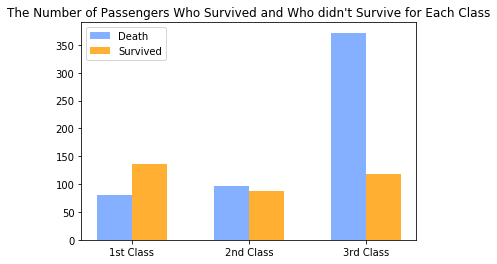

In [16]:
#Q9
death=[table2[1][0],table2[2][0],table2[3][0]]  #number of people who died for each class, respectively
survived=[table2[1][1],table2[2][1],table2[3][1]] #number of survivors for each class, respectively

X2=np.arange(3)
plt.bar(X2,death,label="Death",width=0.3,color="#669DFF",align="center",alpha=0.8)
plt.bar(X2+0.3,survived,label="Survived",width=0.3,color="#FF9D00",align="center",alpha=0.8)
plt.xticks(X2+0.15,("1st Class","2nd Class","3rd Class"))
plt.legend()
plt.title("The Number of Passengers Who Survived and Who didn't Survive for Each Class")

In [17]:
#Q10
print("Survival rate of females:"+str(233/(233+81)))
print("Survival rate of males:"+str(109/(109+468)))
pd.crosstab(index=[df_titanic['Sex'],df_titanic['Survived']],columns=df_titanic['Pclass'],margins=True)

#The survival rate of women is 0.7420382165605095 while the survival rate of men is 0.18890814558058924.
#Therefore, the survival rate of women is higher than men.
#The high survival rate of women might be that the first women were rescued from the ship.

Survival rate of females:0.7420382165605095
Survival rate of males:0.18890814558058924


Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [18]:
#Q11
df_titanic['Age'].max() #max function gets the max value of Age column in df_titanic
#Olders passenger on the ship was 80 years old

80.0

In [19]:
#Q12
df_titanic['Age'].min() #min function gets the min value of Age column in df_titanic

0.42

In [20]:
#Q13
df_titanic['Age'].mean() #mean function gets the average value of Age column in df_titanic
#The average age of the passengers on the ship is 29.69911764705882.

29.69911764705882

Text(0.5, 1.0, 'The Age Distribution of the Passengers Who Survived.')

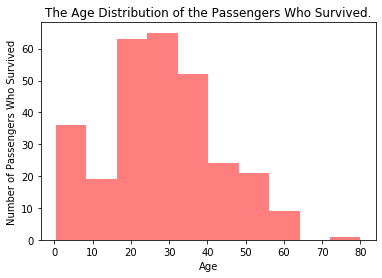

In [21]:
#Q14
survivedHist = df_titanic[df_titanic["Survived"]==1]
survivedHist["Age"].plot(kind="hist",color='red',alpha=0.5,bins=10)
plt.ylabel("Number of Passengers Who Survived")
plt.xlabel("Age")
plt.title("The Age Distribution of the Passengers Who Survived.")
#The number of passengers who survived between the ages of 20-30 is higher than the others.
#The number of passengers who survived between the ages of 70-80 is less than the others.

Text(0.5, 1.0, 'The Age Distribution of the Passengers Who did not Survived.')

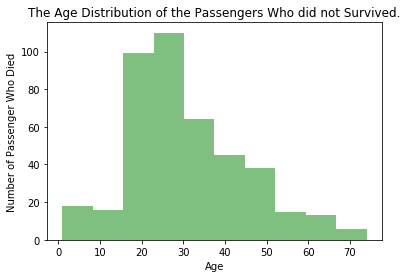

In [22]:
#Q15
deathHist=df_titanic[df_titanic['Survived']==0]
deathHist['Age'].plot(kind='hist',color='green',alpha=0.5,bins=10)
plt.ylabel("Number of Passenger Who Died")
plt.xlabel("Age")
plt.title("The Age Distribution of the Passengers Who did not Survived.")
#The number of passengers who did not survive between the ages of 20-30 is higher than the others.

#When the histograms in question 14 and question 15 are compared, 
#it is seen that the survival rate of passengers under 10 years old is higher than other ages. 
#While about 40 child passengers were living, about 20 children passengers died. 
#The rate comes to about 0.66 which is higher than the others.
#The reason for the high number of deaths between the ages of 20 and 30 may be that the people who were working on the ship are in the 20-30 age range.

In [23]:
#Q16
print("The lowest fare: "+str(df_titanic['Fare'].min())) #min function gets the min value of Fare column in the df_titanic

The lowest fare: 0.0


In [24]:
#Q17
print("The highest fare: "+str(df_titanic['Fare'].max())) #max function gets the max value of Fare column in the df_titanic

The highest fare: 512.3292


In [25]:
#Q18
print("The average fare: "+str(df_titanic['Fare'].mean())) #mean function gets the average value of Fare column in the df_titanic

The average fare: 32.2042079685746


Text(0.5, 0, 'Fare')

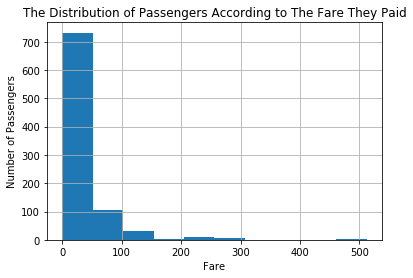

In [26]:
#Q19
df=df_titanic['Fare']
df.hist()
plt.title("The Distribution of Passengers According to The Fare They Paid")
plt.ylabel("Number of Passengers")
plt.xlabel("Fare")
#According to the histogram, more than 700 people paid between 0 and 100

In [27]:
#Q20
under10 = df_titanic[df_titanic['Age']<10] #under the age of 10
ds2 = under10[under10['Parch']==0]
ds2
#It shows that there is only one child under the age of 10 without a parent.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.475,NaN,S
